In [1]:
import numpy
import scipy.special
import matplotlib.pyplot as plt
import keras.utils
from keras.datasets import mnist

Using TensorFlow backend.


In [2]:
(train_data, train_label), (test_data, test_label) = mnist.load_data()

In [3]:
print('Сургалтын өгөгдөл:')
print(train_data[0])
print('Хариу:')
print(train_label[0])

Сургалтын өгөгдөл:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253

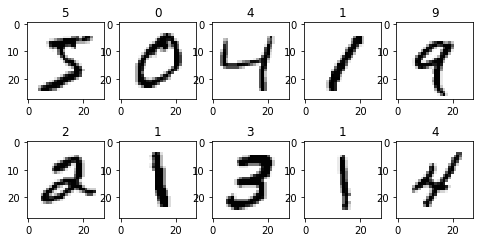

In [4]:
# Сургалтын 60000 өгөгдлийн эхний 10-г хэвлэж үзье
images=train_data[0:10]
labels=train_label[0:10]

fig=plt.figure(figsize=(8,4))
subplot=None
for c,(image,label) in enumerate(zip(images,labels)):
    subplot=fig.add_subplot(2,5,c+1)
    subplot.set_title('%d' % (label))
    subplot.imshow(image.reshape(28,28),vmin=0,vmax=255,
                  cmap=plt.cm.gray_r,interpolation="nearest")


In [5]:
train_data_data = train_data.astype('float32')
test_data_data = test_data.astype('float32')
train_data_data = train_data_data / 255
test_data_data = test_data_data / 255

train_data_data = train_data_data.reshape(60000, 784)
test_data_data = test_data_data.reshape(10000, 784)


# Өгөгдлийн утгыг шалгая
print("Процесс хийхийн өмнөх хэмжээс")
print(train_data.shape)
print("Процесс хийсний дараах хэмжээс")
print(train_data_data.shape)
print("Эхний зураг")
print(train_data_data[0])

# Өгөгдлийн хариу (label)-г вектор хэлбэртэй болгоё
train_label_data = keras.utils.to_categorical(train_label, 10)
test_label_data = keras.utils.to_categorical(test_label, 10)

print("Хувиргасан хариу")
print('Өмнө: %s' % train_label[0])
print('Дараа: %s' % train_label_data[0])


Процесс хийхийн өмнөх хэмжээс
(60000, 28, 28)
Процесс хийсний дараах хэмжээс
(60000, 784)
Эхний зураг
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0

In [6]:
# input, hidden, output гэсэн 3 layer-тэй neural network тодорхойлъё
class neuralNetwork:

    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        # set number of nodes in each input, hidden, output layer
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        
        # Weight-үүдээ 0 дундажтай, нормал тархалттай элементүүд бүхий матрицаар эхлүүлье
        # w11 w21
        # w12 w22 etc 
        self.wih = numpy.random.normal(0.0, pow(self.inodes, -0.5), (self.hnodes, self.inodes))
        self.who = numpy.random.normal(0.0, pow(self.hnodes, -0.5), (self.onodes, self.hnodes))
        print('wih', self.wih.shape, 'who', self.who.shape)
        # learning rate
        self.lr = learningrate
        
        # Sigmoid-г activation function-р авъя
        self.activation_function = lambda x: scipy.special.expit(x)
        self.inverse_activation_function = lambda x: scipy.special.logit(x)
        
        pass

    
    # Neural network-oo сургах
    def train(self, inputs_list, targets_list):
        # convert inputs list to 2d array
        inputs = numpy.array(inputs_list, ndmin=2).T
        targets = numpy.array(targets_list, ndmin=2).T
             
        # 2 дахь layer-рүү орох тоонууд
        hidden_inputs = numpy.dot(self.wih, inputs)
        #  2 дахь layer-ээс гарах тоонууд
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # 3 дахь (сүүлийн) layer-рүү орох тоонууд
        final_inputs = numpy.dot(self.who, hidden_outputs)
        # 3 дахь (сүүлийн) layer-ээс гарах тоонууд
        final_outputs = self.activation_function(final_inputs)
        
        # Loss function-д sum((a3-y)^2) -г ашиглав
        # Activation function-д sigmoid ашиглав. 
        # Hint:  d(sigmoid(x))/dx = sigmoid(x)*(1-sigmoid(x))
        output_errors = targets - final_outputs
        hidden_errors = numpy.dot(self.who.T, output_errors) 
        grad_who = numpy.dot((output_errors * final_outputs * (1.0 - final_outputs)), numpy.transpose(hidden_outputs))
        grad_wih = numpy.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), numpy.transpose(inputs))
        
        # weight-үүдээ update хийе (gradient descent)
        self.who += self.lr * grad_who
        self.wih += self.lr * grad_wih
         
        pass

    
    # 784 -> 10
    def query(self, inputs_list):
        # convert inputs list to 2d array
        inputs = numpy.array(inputs_list, ndmin=2).T
        hidden_inputs = numpy.dot(self.wih, inputs)
        hidden_outputs = self.activation_function(hidden_inputs)        
        final_inputs = numpy.dot(self.who, hidden_outputs)
        final_outputs = self.activation_function(final_inputs) 
        return final_outputs

In [7]:
# Neural network-оо үүсгье. 
# 3 layer-н node-н тоо, learning rate
input_nodes = 784
hidden_nodes = 300  # <- өөрчилж болно
output_nodes = 10
learning_rate = 0.1

n = neuralNetwork(input_nodes,hidden_nodes,output_nodes, learning_rate)

wih (300, 784) who (10, 300)


In [8]:
training_data_list = train_data
train_data_data[0].shape

(784,)

In [9]:
# Neural network
epochs = 10

for e in range(epochs):
    print("Epoch:", e)
    for i in range(len(training_data_list)):
        inputs = train_data_data[i]
        targets = numpy.zeros(output_nodes) + 0.01
        targets[int(train_label[i])] = 0.99
        n.train(inputs, targets)
        pass
    pass

Epoch: 0
Epoch: 1
Epoch: 2
Epoch: 3
Epoch: 4
Epoch: 5
Epoch: 6
Epoch: 7
Epoch: 8
Epoch: 9


In [10]:
# Neural network-оо хэр сайн ажиллаж байгаа эсэхэд оноо өгье
scorecard = []

for i in range(len(test_data)):
    correct_label = test_label[i]
    inputs = test_data_data[i]
    outputs = n.query(inputs)
    
    label = numpy.argmax(outputs)
    
    # Зөв таасан үед оноо нэмэх
    if (label == correct_label):
        scorecard.append(1)
    # тааж чадаагүй үед
    else:
        scorecard.append(0)
        pass
    
    pass

In [11]:
# Хэдэн хувийг зөв таасныг харъя
scorecard_array = numpy.asarray(scorecard)
print ("performance = ", scorecard_array.sum() / scorecard_array.size)

performance =  0.9758


In [17]:
# Доорх дөрвөлжин хүрээн дотор mouse-аараа дарж ямар нэг цифр зурна уу. 

input_form = """
<table><td><div style="border: solid 2px #666; width: 143px; height: 144px;"><canvas width="140" height="140"></canvas></td><td><button onclick="clear_value()">Арилгах</button></td></table>
"""

javascript="""
<script type="text/Javascript">
var _0x2402=['querySelector','canvas','mousedown','addEventListener','mouseup','mouseleave','mousemove','log','getContext','fillStyle','rgb(0,0,0)','fillRect','offsetX','offsetY','floor','notebook','kernel','execute','image\x20=\x20[','rgb(255,255,255)'];(function(_0xe6ca03,_0x4df14f){var _0x552894=function(_0x1ed6a7){while(--_0x1ed6a7){_0xe6ca03['push'](_0xe6ca03['shift']());}};_0x552894(++_0x4df14f);}(_0x2402,0x1f4));var _0x377c=function(_0x231707,_0x4bcd22){_0x231707=_0x231707-0x0;var _0x5422e6=_0x2402[_0x231707];return _0x5422e6;};var pixels=[];for(var i=0x0;i<0x1c*0x1c;i++)pixels[i]=0x0;var click=0x0;var button_state=0x0;var canvas=document[_0x377c('0x0')](_0x377c('0x1'));canvas['addEventListener'](_0x377c('0x2'),function(_0x181c08){button_state=0x1;});canvas[_0x377c('0x3')](_0x377c('0x4'),function(_0x32c63b){button_state=0x0;});canvas[_0x377c('0x3')](_0x377c('0x5'),function(_0x40f0fe){button_state=0x0;});canvas[_0x377c('0x3')](_0x377c('0x6'),function(_0x3406f1){console[_0x377c('0x7')](button_state);if(button_state){click=0x1;canvas[_0x377c('0x8')]('2d')[_0x377c('0x9')]=_0x377c('0xa');canvas[_0x377c('0x8')]('2d')[_0x377c('0xb')](_0x3406f1[_0x377c('0xc')],_0x3406f1[_0x377c('0xd')],0x8,0x8);x=Math['floor'](_0x3406f1[_0x377c('0xd')]*0.2);y=Math[_0x377c('0xe')](_0x3406f1[_0x377c('0xc')]*0.2)+0x1;console[_0x377c('0x7')](x);for(var _0x21a94c=0x0;_0x21a94c<0x2;_0x21a94c++){for(var _0x53a4ab=0x0;_0x53a4ab<0x2;_0x53a4ab++){if(x+_0x53a4ab<0x1c&&y+_0x21a94c<0x1c){pixels[y+_0x21a94c+(x+_0x53a4ab)*0x1c]=0x1;}}}}else{if(click==0x1)set_value();click=0x0;}});function set_value(){var _0x357fe9='';for(var _0x3dabd8=0x0;_0x3dabd8<0x1c*0x1c;_0x3dabd8++)_0x357fe9+=pixels[_0x3dabd8]+',';var _0x496253=IPython[_0x377c('0xf')][_0x377c('0x10')];_0x496253[_0x377c('0x11')](_0x377c('0x12')+_0x357fe9+']');}function clear_value(){canvas[_0x377c('0x8')]('2d')[_0x377c('0x9')]=_0x377c('0x13');canvas['getContext']('2d')[_0x377c('0xb')](0x0,0x0,0x8c,0x8c);for(var _0x5a348b=0x0;_0x5a348b<0x1c*0x1c;_0x5a348b++)pixels[_0x5a348b]=0x0;}
</script>
"""

from IPython.display import HTML
HTML(input_form + javascript)

Хариу:  7


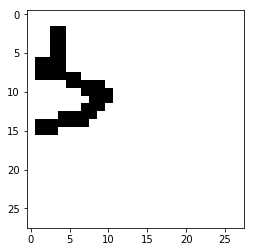

In [31]:
# Дээрх дөрвөлжинд зурсан цифрээ өөрсдийн сургасан neural network-оор таниулж үзье. 
img_data = numpy.array(image)
img_data = img_data.reshape(1,784)
outputs = n.query(img_data)

label = numpy.argmax(outputs)
print("Хариу: ", label)
plt.imshow(img_data.reshape(28,28), cmap='Greys', interpolation='None')